In [1]:
import pandas as pd 

## Preprocessing

### Load data

In [2]:
diabetes_data = pd.read_csv("diabetes.csv", index_col=0) 
diabetes_data.head(10)

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,Good,7.0,0.0,0.0,female,1.0,Cat4,Cat7
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,0.0,0.0,male,13.0,Cat5,Cat6
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Low,0.0,0.0,0.0,male,6.0,Cat4,Cat3
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,female,3.0,Cat6,Cat8
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,6.0,0.0,male,6.0,Cat4,Cat4


### Handle Missing Values 

#### first get number of missing values in ever column 

In [3]:
diabetes_data.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

#### همانطور که میبینیم، تعداد داده‌های پوچ در هر ستون بسیار زیاد نیست و می‌توانیم راحت‌ترین راه هندل کردن آنها، یعنی حذفشان را اعمال کنیم. اما با این کار اطلاعات متغیرهای دیگری که در آن ردیف وجود دارند را از دست می‌دهیم. پس به سراغ روش‌های بهتری می‌رویم.

#### از آنجایی که تعداد داده‌های پوچ در هیچ یک از ستون‌ها در حدی زیاد نیست که به فکر حذف کل آن بیفتیم، به سراغ چک کردن این می‌رویم که آیا در یک ردیف تعداد داده‌های پوچ زیادی وجود دارد یا خیر.


In [4]:
diabetes_data[diabetes_data.isnull().any(axis=1)]

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,NaN,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


#### همانطور که می‌بینیم، ردیف 11691 تعداد داده‌های پوچ زیادی در ستون‌های خود دارد پس آن را حذف می کنیم.

In [5]:
diabetes_data = diabetes_data.drop(11691)

#### Impute missing continuous values with Mean

#### می‌دانیم که برای داده‌های عددی پیوسته (یا مقادیری مثل سن) می‌توانیم از روش میانگین‌گیری استفاده کنیم. پس این ستون‌ها را جدا کرده و مقادیر پوچ درون آنها را با میانگین کل مقادیرشان جایگزین می‌کنیم.

In [6]:
continuous_cols = ['BMI', 'Mental Health', 'Physical Health', 'Age']
for col in continuous_cols:
  diabetes_data[col].fillna(diabetes_data[col].mean(), inplace = True)

In [7]:
diabetes_data.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       1
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              1
No Doctor because of Cost    1
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           1
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

#### می‌بینیم که تمامی مقادیر عددی پیوسته پوچ با میانگین کل مقادیرشان جایگزین شده‌اند و دیگر مقدار پوچ ندارند.


#### Impute missing categorical values with the most frequent category

In [8]:
categorical_cols = [x for x in list(diabetes_data.columns) if x not in continuous_cols]

In [9]:
for col in categorical_cols:
  diabetes_data[col] = diabetes_data[col].astype('category')
  diabetes_data[col] = diabetes_data[col].cat.codes
  diabetes_data[col].fillna(diabetes_data[col].median(), inplace = True)

In [10]:
categorical_cols

['Diabetes_binary',
 'HighBP',
 'High Cholesterol',
 'Cholesterol Check',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Physical Activity',
 'Fruits',
 'Veggies',
 'Heavy Alcohol Consumption',
 'Any Health Care',
 'No Doctor because of Cost',
 'General Health',
 'Difficulty Walking',
 'Sex',
 'Education',
 'Income']

In [11]:
diabetes_data.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

#### به این ترتیب تمامی داده‌های پوچ را با مقادیر نسبتا مناسب جایگزین کردیم.

### Replace white spaces in columns' names with '_'

In [12]:
colnames = diabetes_data.columns
colnames

Index(['Diabetes_binary', 'HighBP', 'High Cholesterol', 'Cholesterol Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical Activity',
       'Fruits', 'Veggies', 'Heavy Alcohol Consumption', 'Any Health Care',
       'No Doctor because of Cost', 'General Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
diabetes_data.columns = diabetes_data.columns.str.replace(' ', '_')

In [14]:
diabetes_data.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Normalizing/Scaling

#### Get max and min vales in every column

In [15]:
diabetes_data.agg(['min','max'])

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
min,0,0,0,0,12.0,0,0,0,0,-1,...,-1,-1,0,0.0,0.0,-1,0,1.0,0,0
max,1,1,1,1,98.0,1,1,1,1,1,...,1,1,4,30.0,30.0,1,1,13.0,5,8


#### BMI: 12-98, 
####            Mental Health: 0-30,      
####            Physical Health: 0-30,  
#### Age: 1.0-13.0  
#### So we need to scale these variables into 0 to 1        

#### به دلیل آنکه بیشتر مقادیر عددی در بازه 0 تا 1 قرار دارند، پس بقیه مقادیر را نیز به این بازه مپ می‌کنیم.

In [16]:
cols_to_scale = ['BMI', 'Mental_Health', 'Physical_Health', 'Age']
a, b = 0, 1

for col in cols_to_scale:
  x, y = diabetes_data[col].min(), diabetes_data[col].max()
  diabetes_data[col] = (diabetes_data[col] - x) / (y - x) * (b - a) + a

In [17]:
diabetes_data

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0,1,0,1,0.162791,0,0,0,1,0,...,1,0,3,0.166667,1.000000,0,1,0.250000,5,7
1,0,1,1,1,0.162791,1,1,0,0,1,...,1,0,3,0.000000,0.000000,0,1,0.916667,5,7
2,0,0,0,1,0.162791,0,0,0,1,1,...,1,0,1,0.000000,0.333333,0,1,1.000000,5,7
3,0,1,1,1,0.186047,1,0,0,1,1,...,1,0,3,0.000000,0.100000,0,1,0.833333,5,7
4,0,0,0,1,0.197674,1,0,0,1,1,...,1,0,0,0.000000,0.000000,0,0,0.583333,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,0.290698,0,0,0,0,0,...,1,0,2,0.000000,0.000000,0,0,0.416667,3,0
70688,1,0,1,1,0.197674,1,0,1,0,1,...,1,0,0,0.000000,0.000000,1,1,0.750000,2,5
70689,1,1,1,1,0.151163,0,0,1,0,1,...,1,0,4,0.500000,0.000000,1,0,1.000000,5,3
70690,1,1,1,1,0.069767,0,0,0,0,0,...,1,0,2,0.000000,0.000000,1,0,0.833333,1,3


### One-hot-encoding

In [18]:
categorical_cols = ['General_Health', 'Sex', 'Education', 'Income']

In [19]:
for col in categorical_cols:
  y = pd.get_dummies(diabetes_data[col], prefix=col)
  diabetes_data = diabetes_data.join(y, how="outer")
  del diabetes_data[col]

In [20]:
y

,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
70687,1,0,0,0,0,0,0,0,0
70688,0,0,0,0,0,1,0,0,0
70689,0,0,0,1,0,0,0,0,0
70690,0,0,0,1,0,0,0,0,0


In [21]:
diabetes_data

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_5,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,1,0,1,0.162791,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,1,0.162791,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0.162791,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,0,1,1,1,0.186047,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0.197674,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,0.290698,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70688,1,0,1,1,0.197674,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
70689,1,1,1,1,0.151163,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
70690,1,1,1,1,0.069767,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Separating 'Diabetes_binary' column as label

In [22]:
diabetes_y = diabetes_data['Diabetes_binary']
del diabetes_data['Diabetes_binary']

In [23]:
diabetes_y

0        0
1        0
2        0
3        0
4        0
        ..
70687    1
70688    1
70689    1
70690    1
70691    1
Name: Diabetes_binary, Length: 70691, dtype: int8

### Create an XGBoost classifier

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from xgboost.callback import early_stop
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV

#### Split train, validation and test

In [25]:
X_train, X_rem, y_train, y_rem = train_test_split(diabetes_data, diabetes_y, train_size=0.8, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [26]:
print(X_train.shape)
print(X_valid.shape)

(56552, 39)
(7069, 39)


#### Define custome scoring function 

In [27]:
def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])

#### Set initial hyperparameters

In [28]:
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.5, colsample_bytree=1, random=123, eval_metric='auc', verbosity=1, tree_method='gpu_hist', early_stop=10)

#### Train classifier

In [29]:
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds=10)

[0]	validation_0-auc:0.780086	validation_1-auc:0.777322
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.796903	validation_1-auc:0.79585
[2]	validation_0-auc:0.805476	validation_1-auc:0.804407
[3]	validation_0-auc:0.806938	validation_1-auc:0.805577
[4]	validation_0-auc:0.809792	validation_1-auc:0.80851
[5]	validation_0-auc:0.810774	validation_1-auc:0.810546
[6]	validation_0-auc:0.811322	validation_1-auc:0.810687
[7]	validation_0-auc:0.812454	validation_1-auc:0.811793
[8]	validation_0-auc:0.813125	validation_1-auc:0.812947
[9]	validation_0-auc:0.815397	validation_1-auc:0.815061
[10]	validation_0-auc:0.817071	validation_1-auc:0.817055
[11]	validation_0-auc:0.818246	validation_1-auc:0.818236
[12]	validation_0-auc:0.819076	validation_1-auc:0.819281
[13]	validation_0-auc:0.820055	validation_1-auc:0.820065
[14]	validation_0-auc:0.82107	validation_1-auc:0.82091
[1

XGBClassifier(early_stop=10, eval_metric='auc', max_depth=4, n_estimators=200,
              random=123, subsample=0.5, tree_method='gpu_hist')

#### Train auc: 0.836114

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int8)

#### Test auc:

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7630834512022631

#### Precision, Recall and Confusion matrix

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2550  987]
 [ 688 2845]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      3537
           1       0.74      0.81      0.77      3533

    accuracy                           0.76      7070
   macro avg       0.76      0.76      0.76      7070
weighted avg       0.76      0.76      0.76      7070



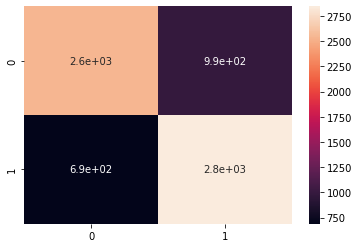

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

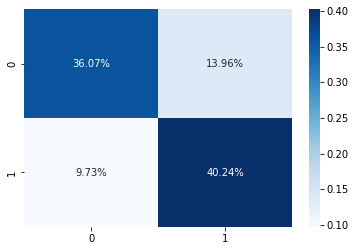

In [35]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

### Tuning hyperparameters

In [36]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

#### Set desired hyperparameters

In [37]:
grid_params = {
    'learning_rate_list': [0.02, 0.05, 0.1, 0.3],
    'max_depth_list': [2, 3, 4],
    'n_estimators_list': [100 ,200 ,300],
    'colsample_bytree': [0.8 ,1]
}

In [38]:
num_folds = 3
seed = 42

In [39]:
# Defining StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds,
                        random_state=seed, shuffle=True)

In [40]:
model = XGBClassifier(subsample=0.5, eval_metric='auc', tree_method='gpu_hist')

In [41]:
grid = GridSearchCV(model, grid_params, refit = True, cv=kfold, verbose=3, n_jobs=-1, scoring=my_roc_auc_score, return_train_score=True) 

In [42]:
# fitting the model for grid search 
grid.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds=10) 

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[0]	validation_0-auc:0.756476	validation_1-auc:0.751461
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.789113	validation_1-auc:0.787501
[2]	validation_0-auc:0.793762	validation_1-auc:0.793709
[3]	validation_0-auc:0.794846	validation_1-auc:0.794593
[4]	validation_0-auc:0.797024	validation_1-auc:0.796604
[5]	validation_0-auc:0.798452	validation_1-auc:0.797329
[6]	validation_0-auc:0.799342	validation_1-auc:0.798676
[7]	validation_0-auc:0.803558	validation_1-auc:0.802822
[8]	validation_0-auc:0.807354	validation_1-auc:0.806932
[9]	validation_0-auc:0.809492	validation_1-auc:0.80976
[10]	validation_0-auc:0.811827	validation_1-auc:0.81205
[11]	validation_0-auc:0.811938	validation_1-auc:0.812168
[12]	validation_0-auc:0.813585	validation_1-auc:0.813838
[13]	validation_0-auc:0.815089	validation_1-auc:0.81

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(eval_metric='auc', subsample=0.5,
                                     tree_method='gpu_hist'),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate_list': [0.02, 0.05, 0.1, 0.3],
                         'max_depth_list': [2, 3, 4],
                         'n_estimators_list': [100, 200, 300]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f16df544320>, verbose=3)

#### Best parameters

In [43]:
print(grid.best_params_)

{'colsample_bytree': 1, 'learning_rate_list': 0.02, 'max_depth_list': 2, 'n_estimators_list': 100}


In [44]:
grid_predictions = grid.predict(X_test)

In [45]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3537
           1       0.74      0.80      0.77      3533

    accuracy                           0.76      7070
   macro avg       0.76      0.76      0.76      7070
weighted avg       0.76      0.76      0.76      7070



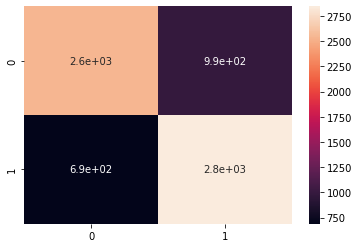

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

#### Create best model

In [47]:
model = XGBClassifier(colsample_bytree=1, 
                      learning_rate_list=0.02, 
                      max_depth_list=2, 
                      n_estimators_list=100, 
                      subsample=0.5, 
                      eval_metric='auc', 
                      Verbosity=1, 
                      early_stopping_rounds=10, 
                      tree_method='gpu_hist')

In [48]:
model.fit(X_train,y_train)

XGBClassifier(Verbosity=1, early_stopping_rounds=10, eval_metric='auc',
              learning_rate_list=0.02, max_depth_list=2, n_estimators_list=100,
              subsample=0.5, tree_method='gpu_hist')

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7626591230551627

#### Precision, Recall and Confusion matrix

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2563  974]
 [ 704 2829]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3537
           1       0.74      0.80      0.77      3533

    accuracy                           0.76      7070
   macro avg       0.76      0.76      0.76      7070
weighted avg       0.76      0.76      0.76      7070



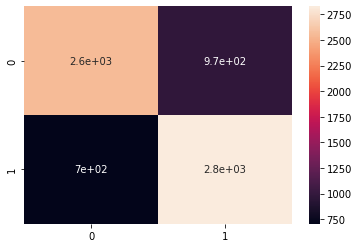

In [51]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

### Illustration of hyperparameters's changings imapact on accuracy

In [52]:
import matplotlib.pyplot as plt

In [53]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate_list,param_max_depth_list,param_n_estimators_list,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.432990,0.176339,0.026928,0.000831,0.8,0.02,2,100,"{'colsample_bytree': 0.8, 'learning_rate_list'...",0.830208,0.828855,0.827946,0.829003,0.000929,37,0.83299,0.833217,0.834384,0.83353,0.000611
1,1.971967,0.159679,0.027547,0.001676,0.8,0.02,2,200,"{'colsample_bytree': 0.8, 'learning_rate_list'...",0.830208,0.828855,0.827946,0.829003,0.000929,37,0.83299,0.833217,0.834384,0.83353,0.000611
2,1.940361,0.050270,0.025907,0.001780,0.8,0.02,2,300,"{'colsample_bytree': 0.8, 'learning_rate_list'...",0.830208,0.828855,0.827946,0.829003,0.000929,37,0.83299,0.833217,0.834384,0.83353,0.000611
3,2.024182,0.023235,0.034411,0.006864,0.8,0.02,3,100,"{'colsample_bytree': 0.8, 'learning_rate_list'...",0.830208,0.828855,0.827946,0.829003,0.000929,37,0.83299,0.833217,0.834384,0.83353,0.000611
4,1.977569,0.077595,0.025623,0.001082,0.8,0.02,3,200,"{'colsample_bytree': 0.8, 'learning_rate_list'...",0.830208,0.828855,0.827946,0.829003,0.000929,37,0.83299,0.833217,0.834384,0.83353,0.000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.560407,0.199201,0.030721,0.010563,1,0.3,3,200,"{'colsample_bytree': 1, 'learning_rate_list': ...",0.829874,0.829159,0.828135,0.829056,0.000713,1,0.83326,0.833585,0.834644,0.83383,0.000591
68,1.990563,0.081774,0.028404,0.004254,1,0.3,3,300,"{'colsample_bytree': 1, 'learning_rate_list': ...",0.829874,0.829159,0.828135,0.829056,0.000713,1,0.83326,0.833585,0.834644,0.83383,0.000591
69,1.973933,0.026229,0.024141,0.000665,1,0.3,4,100,"{'colsample_bytree': 1, 'learning_rate_list': ...",0.829874,0.829159,0.828135,0.829056,0.000713,1,0.83326,0.833585,0.834644,0.83383,0.000591
70,2.050854,0.022485,0.023189,0.000188,1,0.3,4,200,"{'colsample_bytree': 1, 'learning_rate_list': ...",0.829874,0.829159,0.828135,0.829056,0.000713,1,0.83326,0.833585,0.834644,0.83383,0.000591


In [68]:
def plot_gridsearch_results(grid):
    res = grid.cv_results_

    means_train = res['mean_train_score']
    stds_train = res['std_train_score']
    means_test = res['mean_test_score']
    stds_test = res['std_test_score']

    masks=[]
    m_names= list(grid.best_params_.keys())
    for pk, pv in grid.best_params_.items():
        masks.append(list(res['param_'+pk].data==pv))

    grid_params = grid.param_grid
    fig, ax = plt.subplots(1,len(grid_params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score for each parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(m_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_m = m.all(axis=0)
        best_index = np.where(best_parms_m)[0]
        x = np.array(grid_params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

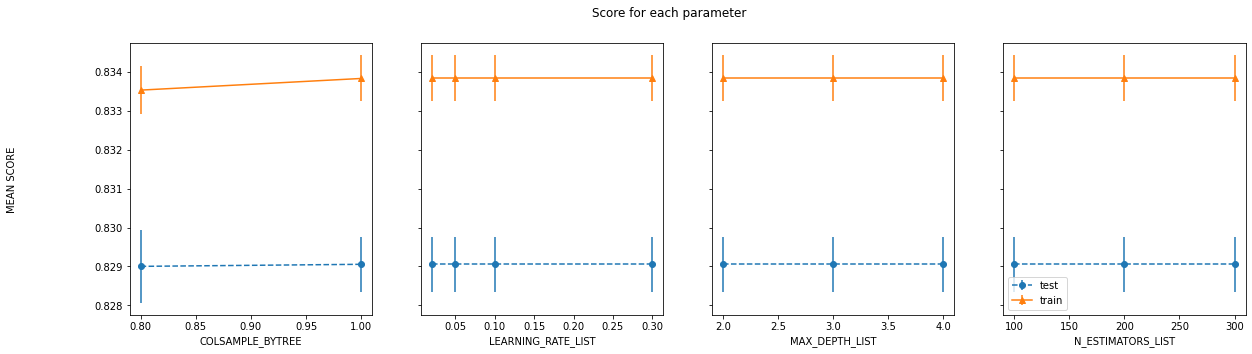

In [69]:
plot_gridsearch_results(grid)

<div dir=rtl>
هرچه score بهتر باشد یعنی عملکرد مدل با آن پارامتر بهتر بوده است. در نمودارهای بالا به وضوح می‌توانیم این مقایسه بین عملکردها را به تفکیک پارامترها و مقدارهایشان مشاهده کنیم. 
</div>